<a href="https://colab.research.google.com/github/Steivann/tugas-data-mining/blob/main/%5BQuestion%5D_Exercise_Week_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [2]:
#1
df = pd.read_csv("https://raw.githubusercontent.com/Steivann/Dataset/refs/heads/main/bread%20basket.csv")
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [3]:
#2 info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
#3 check missing values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a _________________________. (fill that blank on the section below)

itu menunjukkan data yang kita gunakan tidak memiliki missing value

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-5-a71672ec87d6>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date_time']).dt.date


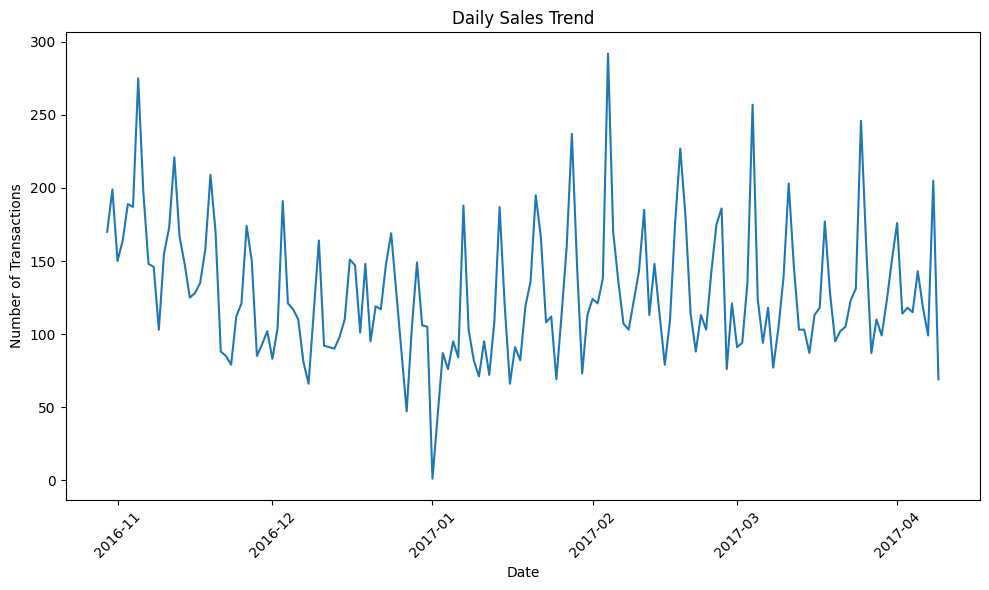

In [5]:
# 5
df['date'] = pd.to_datetime(df['date_time']).dt.date

daily_sales = df.groupby('date').size()

plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Transactions', linestyle='-', marker='')

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Sales Trend')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [6]:
# 6
df['day'] = pd.to_datetime(df['date_time']).dt.day
df['month'] = pd.to_datetime(df['date_time']).dt.month
df['year'] = pd.to_datetime(df['date_time']).dt.year
df['time'] = pd.to_datetime(df['date_time']).dt.time
df['hour'] = pd.to_datetime(df['date_time']).dt.hour
df['day_name'] = pd.to_datetime(df['date_time']).dt.day_name()

df.drop('date', axis=1, inplace=True)

df.sample(5)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-6-25653b77619a>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['day'] = pd.to_datetime(df['date_time']).dt.day
<ipython-input-6-25653b77619a>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['month'] = pd.to_datetime(df['date_time']).dt.month
<ipython-input-6-25653b77619a>:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified

,Transaction,Item,date_time,period_day,weekday_weekend,day,month,year,time,hour,day_name
4764,2347,Bread,30-11-2016 13:29,afternoon,weekday,30,11,2016,13:29:00,13,Wednesday
20317,9588,Bread,08-04-2017 11:39,morning,weekend,8,4,2017,11:39:00,11,Saturday
6961,3497,Tea,19-12-2016 15:16,afternoon,weekday,19,12,2016,15:16:00,15,Monday
18183,8636,Coffee,23-03-2017 13:16,afternoon,weekday,23,3,2017,13:16:00,13,Thursday
1344,654,Bread,06-11-2016 10:12,morning,weekend,6,11,2016,10:12:00,10,Sunday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


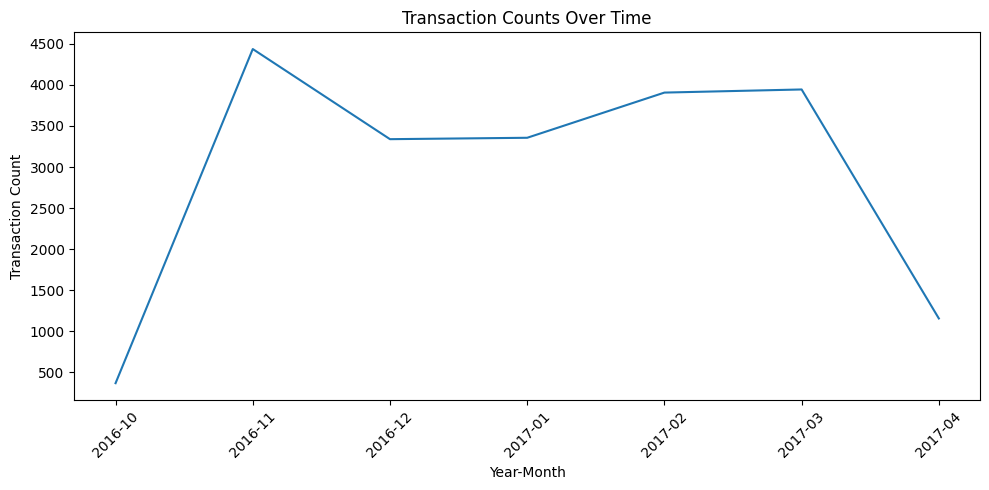

In [7]:
# 7
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')
df['Year-Month'] = df['date_time'].dt.to_period('M').astype(str)
monthly_data = df.groupby('Year-Month').size().reset_index(name='Transaction Count')
plt.figure(figsize=(10, 5))
plt.plot(monthly_data['Year-Month'], monthly_data['Transaction Count'])
plt.title('Transaction Counts Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

Visualisasi  di atas menunjukkan seluruh jumlah transaksi dari 2016 bulan 10 hingga 2017 bulan 4 fungsinya sebagai trend untuk melihat dimana letak transaksi yang paling tinggi hingga paling rendah dan bisa dilihat paling tinggi adalah pada tahun 2016 bulan 11 dan yang paling rendah adalah pada tahun 2016 bulan 10

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [8]:
#9
weekday_names = df.loc[df['weekday_weekend'] == 'weekday', 'day_name'].unique()

# Extract unique weekend names
weekend_names = df.loc[df['weekday_weekend'] == 'weekend', 'day_name'].unique()

print("Unique weekday names:", weekday_names)
print("Unique weekend names:", weekend_names)


Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [9]:
#10
df['month'] = df['date_time'].dt.month
df['day_name'] = df['date_time'].dt.day_name()

transaction_agg = df.pivot_table(index='month', columns='day_name', values='Transaction', aggfunc='count', fill_value=0)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transaction_agg = transaction_agg[days_order]

transaction_agg


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is _____

 Menunjukkan jumlah transaksi untuk setiap hari dan tiap bulan. Kita bisa melihat bahwa pada hari sabtu merupakan transaksi tertinggi dan bisa dilihat bahwa transaksinya cukup konsisten kecuali di bulan ke -10, penjualannya sangat rendah atau tidak ada penjualan sama sekali, mungkin dikarenakan toko tersebut tutup. Dan bisa dilihat dari keseluruhan datanya bahwa orang - orang kebanyakan belanja di hari - hari weekend.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


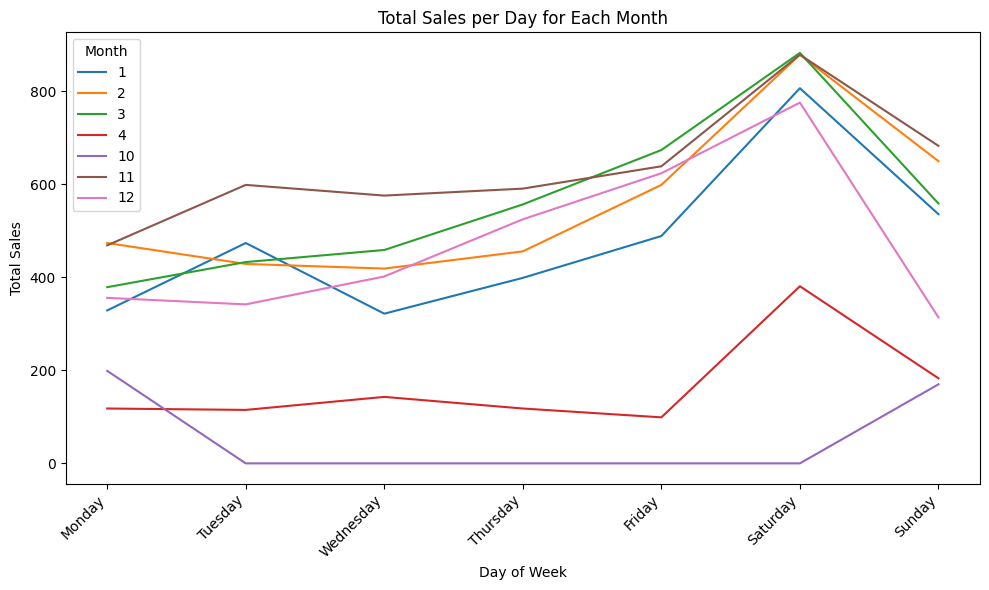

In [10]:
# 12
transaction_table = df.groupby(['month', 'day_name'])['Transaction'].count().reset_index()
transaction_table = transaction_table.pivot(index='month', columns='day_name', values='Transaction').fillna(0)
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
transaction_table = transaction_table[days_order]
transaction_table = transaction_table.astype(int)
transaction_table = transaction_table.T
transaction_table.plot(kind='line', figsize=(10, 6))
plt.title('Total Sales per Day for Each Month')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Month')
plt.tight_layout()
plt.show()


13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

visualisasi tersebut merupakan visualisasi dari trend penjualan harian. Terlihat bahwa Hari Sabtu adalah hari dengan penjualan tertinggi, sementara hari Rabu adalah yang terendah. Dilihat dari trend grafik tersebut bisa dilihat bahwa trend cenderung lebih naik pada weekend

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [11]:
# 14
df['period_day'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [12]:
# 15
df.groupby('period_day')['hour'].unique()
print('Unique morning_hour:', df[df['period_day'] == 'morning']['hour'].unique())
print('Unique afternoon_hour:', df[df['period_day'] == 'afternoon']['hour'].unique())
print('Unique evening_hour:', df[df['period_day'] == 'evening']['hour'].unique())
print('Unique night_hour:', df[df['period_day'] == 'night']['hour'].unique())

Unique morning_hour: [ 9 10 11  8  7  1]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

Sepertinya kesalahannya ada pada unique pagi hari yaitu ada jam 1 yang seharusnya masuk ke malam hari, hal tersebut bisa terjadi mungkin dikarenakan Data Input Salah, Mungkin ada kesalahan saat data "period_day" dicatat.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


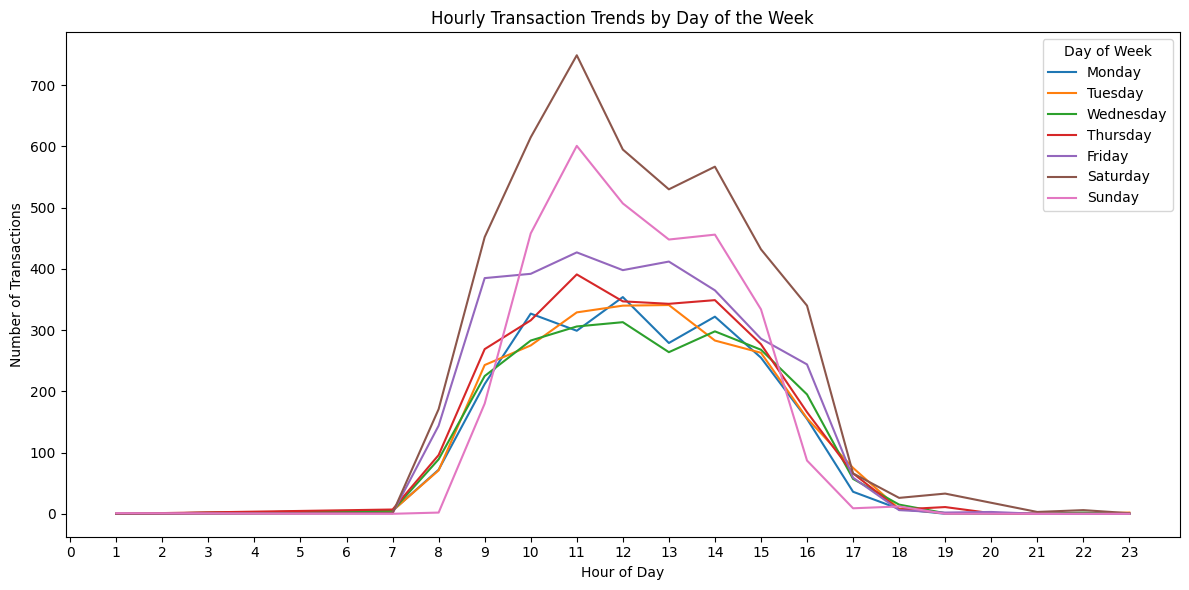

In [13]:
# 17
daily_hourly_sales = df.groupby(['day_name', 'hour'])['Transaction'].count().reset_index()
daily_hourly_sales = daily_hourly_sales.pivot(index='hour', columns='day_name', values='Transaction').fillna(0)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_hourly_sales = daily_hourly_sales[days_order]
daily_hourly_sales.plot(kind='line', figsize=(12, 6))
plt.title('Hourly Transaction Trends by Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))
plt.legend(title='Day of Week')
plt.tight_layout()
plt.show()


18. The daily sales trend plot reveals that _______

Dari visualisasi di atas adalah ini menunjukkan trend penjualan dan bisa dilihat bahwa, jam- jam sibuk adalah pada mulai pukul 7 hingga 17 dan puncaknya adalah 11 siang, dan yang paling rendah adalah waktu di bawah pukul 7 dan di atas pukul 18.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


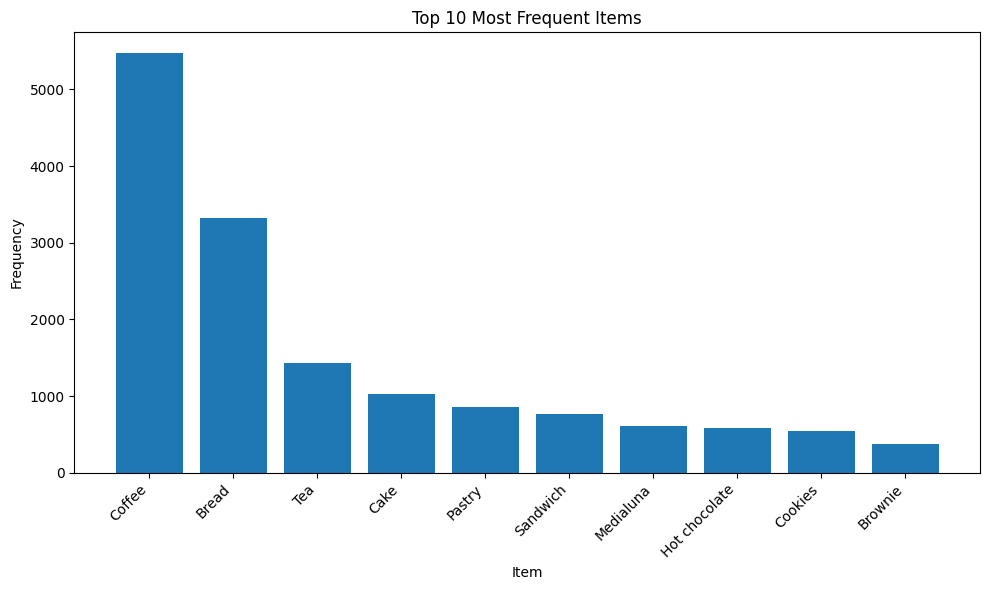

In [16]:
# 19
item_count = df.groupby('Item')['Transaction'].count().reset_index()
item_count = item_count.rename(columns={'Transaction': 'Frequency'})
item_count = item_count.sort_values(by=['Frequency'], ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(item_count['Item'].head(10), item_count['Frequency'].head(10))
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Items')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-18-2f15a445176c>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


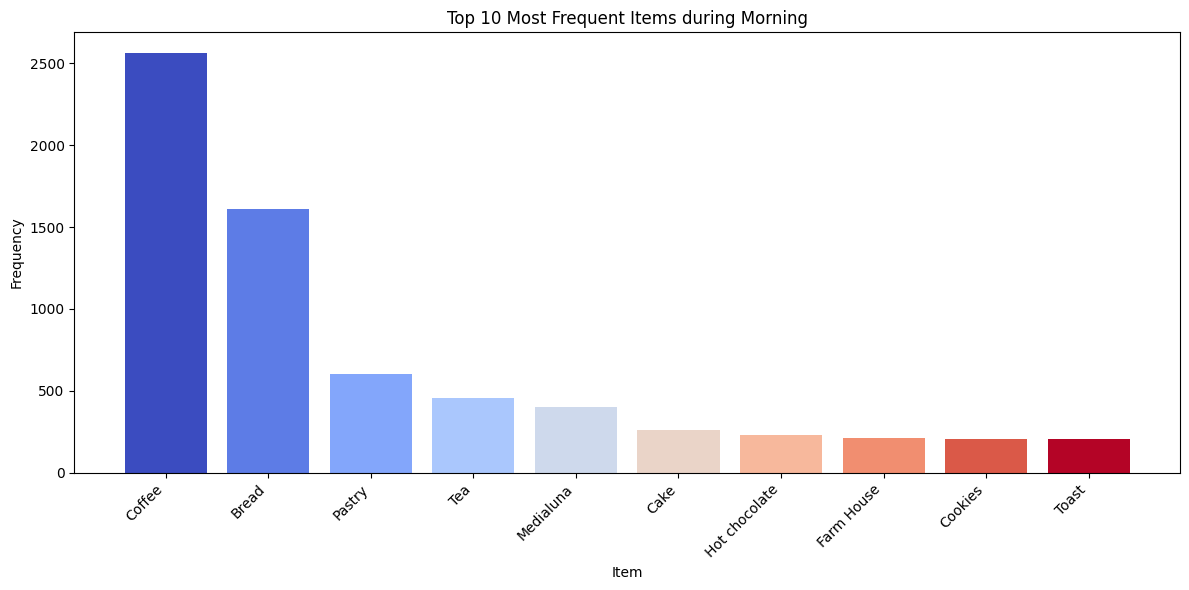

<ipython-input-18-2f15a445176c>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


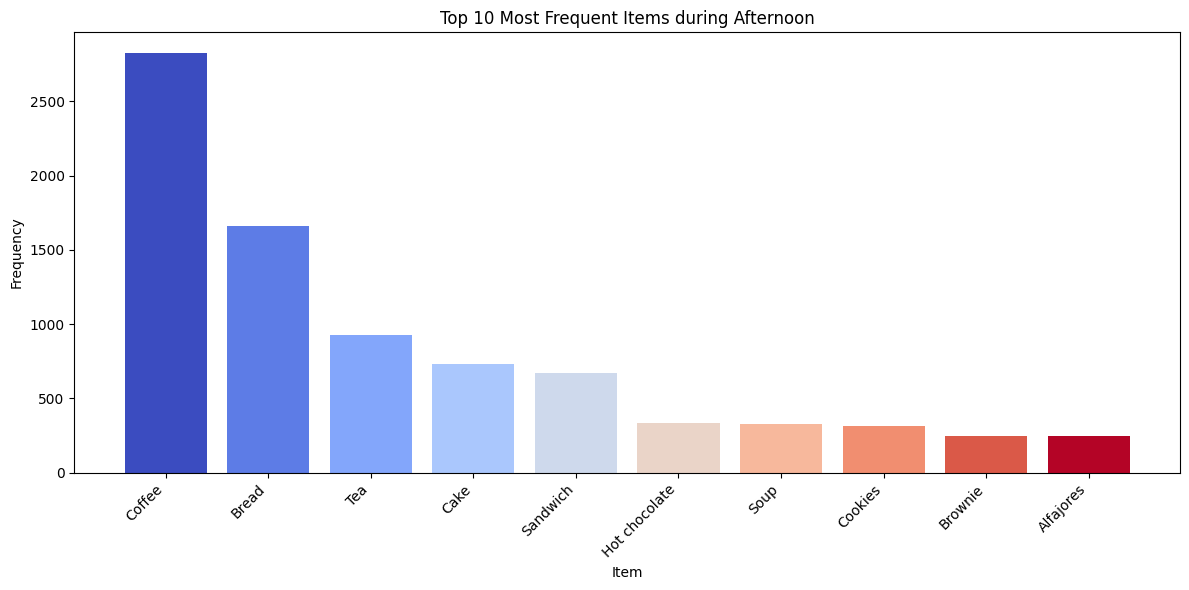

<ipython-input-18-2f15a445176c>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


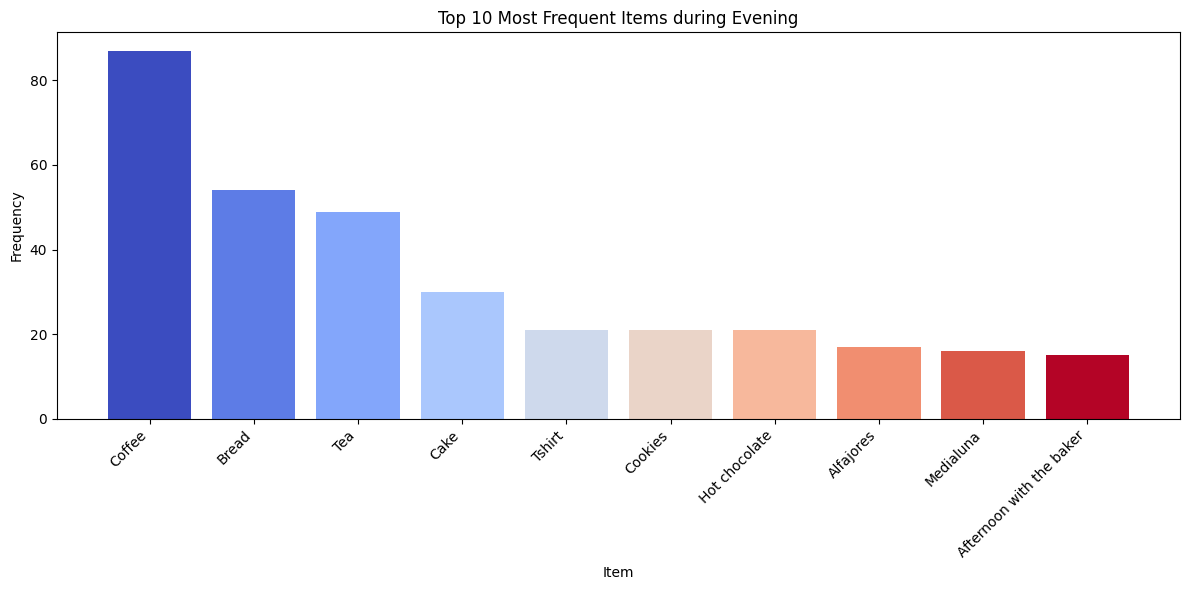

<ipython-input-18-2f15a445176c>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


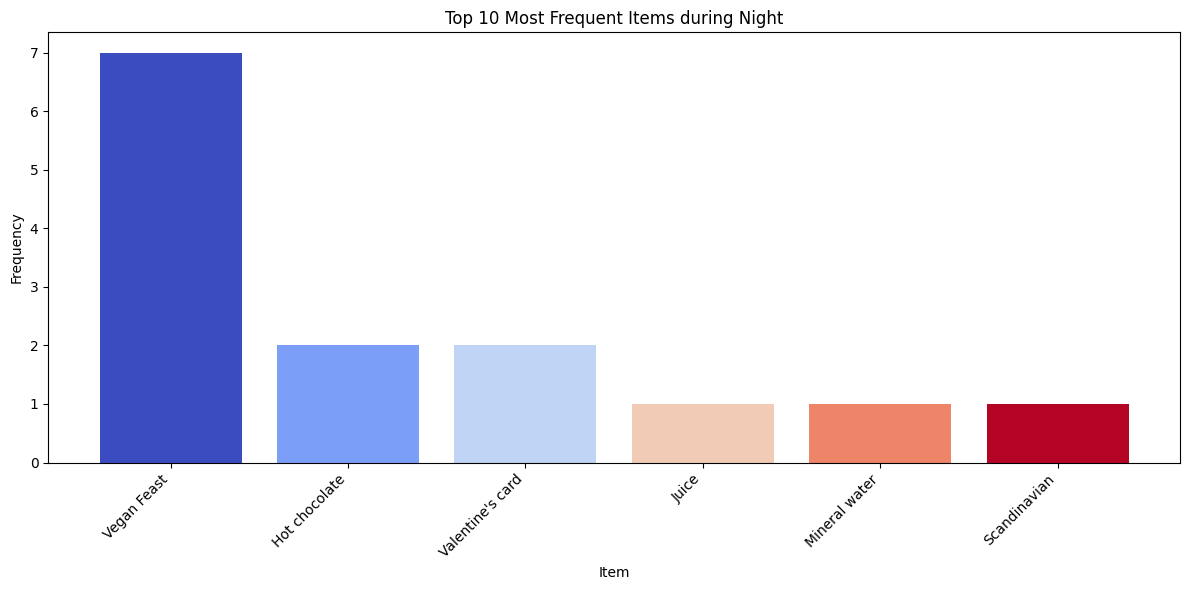

In [18]:
# 20
import matplotlib.cm as cm

def plot_top_items_by_period(period):
    period_data = df[df['period_day'] == period]

    item_frequency = period_data.groupby('Item')['Transaction'].count().reset_index()
    item_frequency = item_frequency.rename(columns={'Transaction': 'Frequency'})
    item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)
    plt.figure(figsize=(12, 6))
    colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))
    plt.bar(item_frequency['Item'].head(10), item_frequency['Frequency'].head(10),
            color=[colors(i) for i in range(len(item_frequency.head(10)))])
    plt.xlabel('Item')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Most Frequent Items during {period.capitalize()}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for period in df['period_day'].unique():
    plot_top_items_by_period(period)


21. It turns out that there is something different in the plot above, the insight is ____


Visualisasi di atas ini menunjukkan top 10 item dengan penjualan paling tinggi di tiap waktu, bisa dilihat dalam visualisasi tersebut bahwa sepanjang Pagi, Siang, dan sore kopi adalah yang terlaris, dan bisa dilihat juga pada Malam hari, hanya 6 item yang terjual. dan yang paling tinggi merupakan vegan feast.

I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


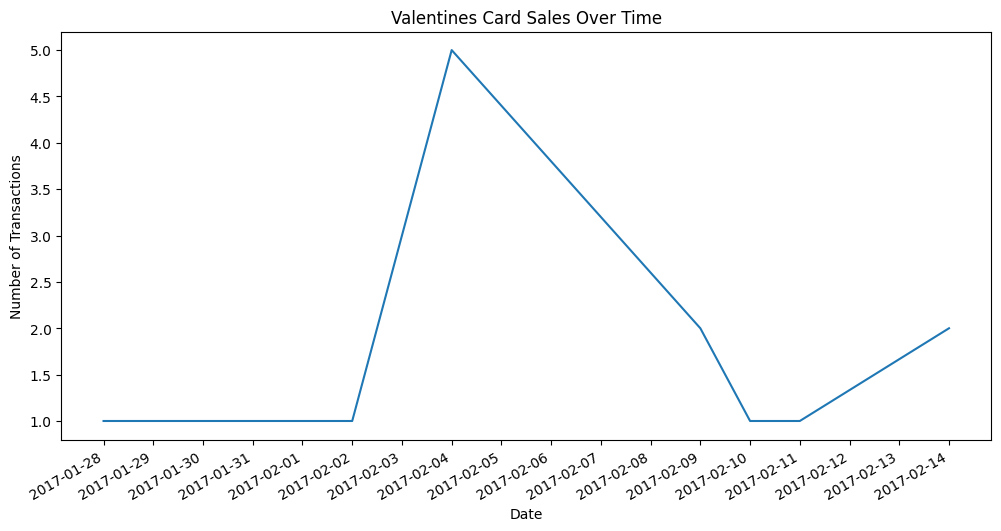

In [21]:
#22
valentines_card = df[df['Item'] == "Valentine's card"]
valentines_sales = valentines_card.groupby(pd.to_datetime(valentines_card['date_time']).dt.date)['Transaction'].count()
plt.figure(figsize=(12, 6))
plt.plot(valentines_sales.index, valentines_sales.values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Valentines Card Sales Over Time')
plt.show()

23. I found the insight from the sale of the Valentine's cards above is ____


penjualan tertinggi kartu Valentine adalah pada 4 febuari, dan ada peningkatan juga yyang tidak terlalu banyak pada akhir tanggal sekitar 11 hingga 14 febuari, adanya peningkatan ini dikarenakan pada bulan febuari ini banyak yang ingin merayakan hari valentine yaitu pada tanggal 14

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [22]:
# 24
apriori_data = pd.crosstab(df['Transaction'], df['Item'])
apriori_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#25
basket = (df.groupby(['Transaction', 'Item'])['Item']
          .count().unstack().reset_index().fillna(0)
          .set_index('Transaction'))
# Convert quantities to 1 and 0
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)
if 'NONE' in basket_sets.columns:
  basket_sets = basket_sets.drop('NONE', axis=1)
basket_sets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-24-652887aa4713>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [26]:
# 26
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)
frequent_itemsets_output = frequent_itemsets[['support', 'itemsets']]
frequent_itemsets_output

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [28]:
# 27
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)
frequent_itemsets_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
frequent_itemsets_rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
1,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
2,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
3,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
4,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
5,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
6,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
7,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
8,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048
9,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



Toko roti mengalami puncak penjualan di bulan November.Weekend, terutama hari Sabtu, adalah hari-hari tersibuk untuk toko roti, menunjukkan preferensi pelanggan yang lebih tinggi untuk pembelian di akhir pekan. Penjualan harian mencapai puncaknya antara pukul 7 pagi hingga 5 sore, dengan aktivitas tertinggi sekitar pukul 11 siang. Kopi adalah item yang paling populer secara keseluruhan dan secara konsisten menempati peringkat tinggi di berbagai periode hari.
Roti dan kue kering juga merupakan pembelian yang sering dilakukan. Terdapat item populer selama periode yang berbeda: misalnya, "Vegan Feast" sangat populer pada malam hari.

Berdasarkan Aprirori ada 2 hal yaitu :
1. Ada beberaa hal menunjukkan bahwa pelanggan yang membeli Coffee memiliki kemungkinan 60% (confidence) untuk juga membeli Pastry. Lift sebesar 1.2 menunjukkan bahwa pembelian Coffee dan Pastry bersamaan 1.2 kali lebih mungkin daripada jika pembeliannya independen.
2. Menunjukkan bahwa pelanggan yang membeli Bread memiliki kemungkinan 50% (confidence) untuk juga membeli Coffee. Lift sebesar 1.1 menunjukkan asosiasi yang lebih lemah dibandingkan aturan pertama.